In [315]:
import nbsetup
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def toss(wealth):
    return wealth*0.6 if np.random.random() < 0.5 else wealth*1.5

In [9]:
[toss(1) for _ in range(10)]

[0.6, 1.5, 1.5, 0.6, 1.5, 0.6, 0.6, 1.5, 1.5, 1.5]

In [47]:
TRAILS = 10000
FLIPS = 500
data = []
for t in range(TRAILS):
    w = 1
    for x in range(FLIPS):
        w = toss(w)
        data.append({'t': t, 'w': w, 'x': x})
df = pd.DataFrame(data)

<AxesSubplot:xlabel='x', ylabel='w'>

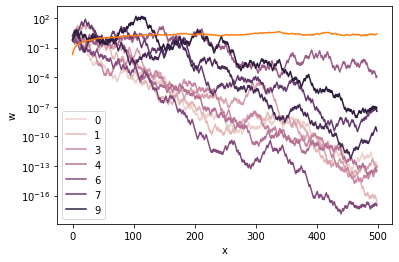

In [56]:
sns.lineplot(data=df.query('t<10'), x='x', y='w', hue='t').set(yscale='log')
expectation = df.groupby('x').mean().reset_index()
sns.lineplot(x=expectation['x'], y=expectation['w'])

In [316]:
def spread(p, a=1.02):
    return -p*a if np.random.random() < 0.5 else +p*a

In [402]:
TRAILS = 10000
FLIPS = 100
data = []
for t in range(TRAILS):
    p = np.random.random()
    for x in range(FLIPS):
        p = spread(p)
        data.append({'t': t, 'w': p, 'x': x})
    nbsetup.cp(t)
df2 = pd.DataFrame(data)

9999


[Text(0.5, 0, 'Iteration i'),
 Text(0, 0.5, ''),
 (-8.0, 8.0),
 Text(0.5, 1.0, 'Ensemble averages')]

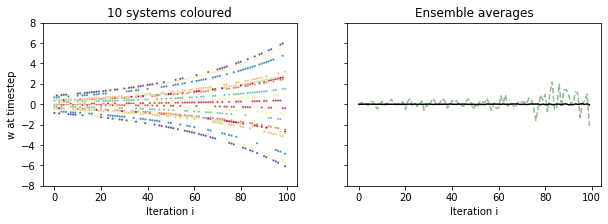

In [403]:
fig, (left, center) = plt.subplots(1, 2, figsize=(10,3), sharey=True)
dfs = df2.query('t<10&x<100')
sns.scatterplot(data=dfs, x='x', y='w', hue='t', palette='Spectral', s=5, legend=False, ax=left)
expectation = dfs.groupby('x').mean().reset_index()
sns.lineplot(x=expectation['x'], y=expectation['w'], color='darkseagreen', linestyle='dashed', ax=center)
expectation = df2.groupby('x').mean().reset_index()
sns.lineplot(x=expectation['x'], y=expectation['w'], color='black', ax=center)

#average = df2.groupby('t').mean().reset_index()
#sns.histplot(average['w'])

left.set(xlabel='Iteration i', ylabel='w at timestep', ylim=(-8,8), title='10 systems coloured')
center.set(xlabel='Iteration i', ylabel=None, ylim=(-8,8), title='Ensemble averages')

In [375]:
TRIALS = 4
STEPS = 100
PARTICLES = 5
data = []
for t in range(TRIALS):
    to = np.random.random()*8+t*10
    for p in range(PARTICLES):
        for x in range(STEPS):
            data.append({
                'x': x,
                'y': np.sin((x+to)*0.05*np.pi)+np.random.random()/5,
                't': t,
                'p': p,
            })
df3 = pd.DataFrame(data)

In [376]:
PALETTES = ('mako_r', 'rocket_r', 'Greens', 'Wistia')

In [389]:
data = []
for t in range(TRIALS):
    to = t*10+np.random.random()*8
    for p in range(PARTICLES):
        po = p*7+np.random.random()*8
        for x in range(STEPS):
            data.append({
                'x': x,
                'y': np.sin((x+to+po)*0.05*np.pi)+np.random.random()/5,
                't': t,
                'p': p,
            })
df4 = pd.DataFrame(data)

[Text(0.5, 0, 'Iteration i'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '4 system, 5 particles')]

<Figure size 432x288 with 0 Axes>

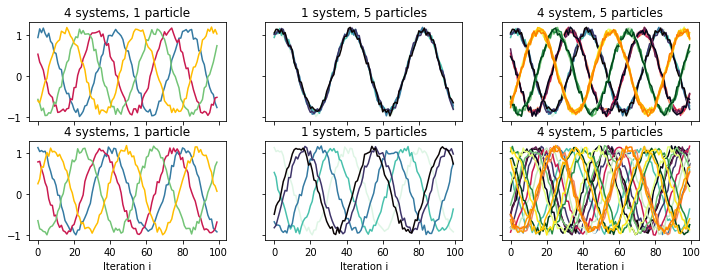

In [390]:
plt.tight_layout()
fig, axes = plt.subplots(2,3, figsize=(12,4), sharex=True, sharey=True)

sns.lineplot(data=df3[df3['t']==0], x='x', y='y', hue='p', palette=PALETTES[0], ax=axes[0][1], legend=False)
sns.lineplot(data=df4[df4['t']==0], x='x', y='y', hue='p', palette=PALETTES[0], ax=axes[1][1], legend=False)

for i, palette in enumerate(PALETTES):
    sns.lineplot(data=df3[df3['t']==i], x='x', y='y', hue='p', palette=palette, legend=False, ax=axes[0][2])
    sns.lineplot(data=df3.query('t==%s & p==0' % (i,)), x='x', y='y', hue='p', palette=palette, legend=False, ax=axes[0][0])

for i, palette in enumerate(PALETTES):
    sns.lineplot(data=df4[df4['t']==i], x='x', y='y', hue='p', palette=palette, legend=False, ax=axes[1][2])
    sns.lineplot(data=df4.query('t==%s & p==0' % (i,)), x='x', y='y', hue='p', palette=palette, legend=False, ax=axes[1][0])

axes[0][1].set(xlabel='Iteration i', ylabel=None, title='1 system, %s particles' % PARTICLES)
axes[1][1].set(xlabel='Iteration i', ylabel=None, title='1 system, %s particles' % PARTICLES)

axes[0][0].set(xlabel='Iteration i', ylabel=None, title='%s systems, 1 particle' % (TRIALS))
axes[1][0].set(xlabel='Iteration i', ylabel=None, title='%s systems, 1 particle' % (TRIALS))

axes[0][2].set(xlabel='Iteration i', ylabel=None, title='%s systems, %s particles' % (TRIALS,PARTICLES))
axes[1][2].set(xlabel='Iteration i', ylabel=None, title='%s systems, %s particles' % (TRIALS,PARTICLES))




In [398]:
def plot_systems(df):
    plt.tight_layout()
    fig, axes = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
    
    sns.lineplot(data=df[df['t']==0], x='x', y='y', hue='p', palette=PALETTES[0], ax=axes[1], legend=False)
    
    for i, palette in enumerate(PALETTES):
        sns.lineplot(data=df[df['t']==i], x='x', y='y', hue='p', palette=palette, legend=False, ax=axes[2])
        sns.lineplot(data=df.query('t==%s & p==0' % (i,)), x='x', y='y', hue='p', palette=palette, legend=False, ax=axes[0])
    
    axes[1].set(xlabel='Iteration i', ylabel=None, title='1 system, %s particles' % PARTICLES)    
    axes[0].set(xlabel='Iteration i', ylabel=None, title='%s systems, 1 particle' % (TRIALS))    
    axes[2].set(xlabel='Iteration i', ylabel=None, title='%s systems, %s particles' % (TRIALS,PARTICLES))
    
    return fig


<Figure size 432x288 with 0 Axes>

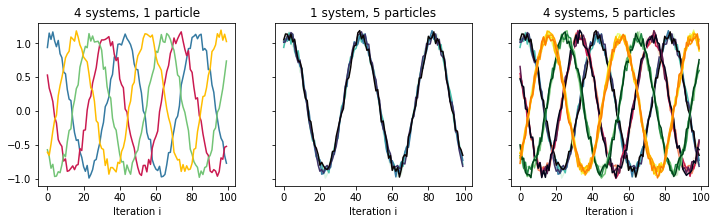

In [399]:
f3 = plot_systems(df3)

<Figure size 432x288 with 0 Axes>

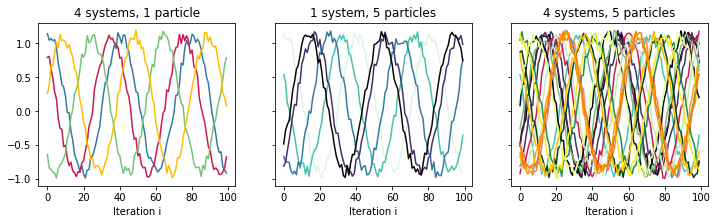

In [400]:
f4 = plot_systems(df4)